# Photon ID efficiency

**Efficiency** of a selection is defined as a ration of number of events that pass the selection to the number of all considered events: 

$efficiency = \frac{N_{pass}}{N_{all}}$.

**Photon ID efficiency** is therefore the fraction of events passing the photon ID cuts on photon shower shape variables. In ATLAS there are three photon ID selection criterea, also called menus: **loose, medium and tight** (please look at ATLAS photon ID papers for more details).

In this notebook we will learn how to compute the tight photon ID efficiency defined in ATLAS through 9 *rectangular* cuts applied on photon shower shapes.

# Loading data

Same as in a previous notebook. 

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook

import numpy as np
import pandas as pd
import ROOT
import root_numpy as rootnp
import array

Welcome to JupyROOT 6.18/04


In [2]:
fname_sig = '/Users/okiverny/Samples/photonID/PyPt17_inf_mc16ad_v23.root'
fname_bkg = '/Users/okiverny/Samples/photonID/Py8_jetjet_mc16ad_v21.root'

In [3]:
list_of_branches_ShowerShapes=['y_Reta',
                  'y_Rphi',
                  'y_weta1',
                  'y_weta2',
                  'y_deltae',
                  'y_fracs1',
                  'y_Eratio',
                  'y_wtots1',
                  'y_Rhad',
                  'y_Rhad1',
                  'y_f1',
                  'y_e277']

list_of_branches_Isolations=['y_ptcone20',
                  'y_ptcone40',
                  'y_topoetcone20',
                  'y_topoetcone40']

list_of_branches_for_binning=['y_eta',
                        'y_pt',
                        'evt_mu',
                        'y_convType']

list_of_branches_for_selection=['y_isTruthMatchedPhoton', 'acceptEventPtBin','y_IsLoose','y_IsTight']

weight_branch=['mcTotWeight']

list_of_branches = list_of_branches_ShowerShapes+list_of_branches_Isolations+list_of_branches_for_binning
list_of_branches = list_of_branches+list_of_branches_for_selection+weight_branch

In [4]:
selection_sig = 'y_pt>25 && (y_eta<2.37) && (y_eta<1.37 || y_eta>1.52) && y_isTruthMatchedPhoton'
selection_bkg = 'y_pt>25 && (y_eta<2.37) && (y_eta<1.37 || y_eta>1.52) && !y_isTruthMatchedPhoton'

file_sig,file_bkg = ROOT.TFile(fname_sig),ROOT.TFile(fname_bkg)
tree_sig,tree_bkg = file_sig.Get('SinglePhoton'), file_bkg.Get('SinglePhoton')

Note on number of signal and background events. Increase Nbkg in case you want to get an efficiency for background events.

In [5]:
nEvents_sig = None # 5000000; None is to load all events
nEvents_bkg = 2000
#nEvents = None

data_sig = rootnp.tree2array(tree_sig, branches=list_of_branches, 
                        selection=selection_sig,
                        start=0, stop=nEvents_sig)
data_bkg = rootnp.tree2array(tree_bkg, branches=list_of_branches, 
                        selection=selection_bkg,
                        start=0, stop=nEvents_bkg)

weights_sig = rootnp.tree2array(tree_sig, branches=weight_branch, selection=selection_sig, start=0, stop=nEvents_sig)
weights_bkg = rootnp.tree2array(tree_bkg, branches=weight_branch, selection=selection_bkg, start=0, stop=nEvents_bkg)

In [6]:
# Signal
df_sig = pd.DataFrame(data_sig, columns=list_of_branches)
df_sig['class']=1 # indicator of signal photon sample

# Background
df_bkg = pd.DataFrame(data_bkg, columns=list_of_branches)
df_bkg['class']=0 # indicator of signal photon sample

# Sum
df = df_sig.append(df_bkg, ignore_index=True)

df.head(10)

,y_Reta,y_Rphi,y_weta1,y_weta2,y_deltae,y_fracs1,y_Eratio,y_wtots1,y_Rhad,y_Rhad1,...,y_eta,y_pt,evt_mu,y_convType,y_isTruthMatchedPhoton,acceptEventPtBin,y_IsLoose,y_IsTight,mcTotWeight,class
0,0.972616,0.979436,0.474282,0.009391,34.013012,0.161792,0.873508,2.472467,-0.010997,-0.011572,...,1.275991,25.195410,38.50,2,True,False,True,True,63722.749407,1
1,0.954023,0.961080,0.728988,0.011122,24.538483,0.370756,0.928990,2.311160,-0.016081,-0.020624,...,-0.865328,35.218857,12.50,0,True,True,True,False,62542.777742,1
2,0.990215,0.971752,0.580966,0.010202,11.804001,0.190276,0.965500,1.386777,0.003793,0.000287,...,0.228229,27.045713,27.50,0,True,True,True,True,74664.775529,1
3,0.946138,0.972694,0.579549,0.009874,1.801514,0.177871,0.953727,1.813492,0.000280,-0.000684,...,0.320727,34.339340,28.49,0,True,True,True,True,65722.992864,1
4,0.946700,0.924887,0.667082,0.011356,38.541672,0.296833,0.967781,2.288324,-0.010014,-0.004649,...,1.774123,25.071852,23.50,1,True,True,True,True,71861.751762,1
5,0.959300,0.924168,0.584717,0.011018,54.218590,0.291046,0.736818,2.837667,0.003227,0.003908,...,0.954362,26.666208,14.49,1,True,False,True,False,68407.839861,1
6,0.939520,0.793680,0.784001,0.010483,72.304474,0.523490,0.926294,3.019401,0.019256,0.007016,...,-1.641809,35.619251,25.50,3,True,True,True,False,54427.890743,1
7,0.870794,0.920906,0.577045,0.016011,9.278030,0.189791,0.938364,1.648167,0.186418,0.094149,...,-2.110128,26.612223,22.50,0,True,False,False,False,75399.187274,1
8,0.971119,0.937279,0.622121,0.010630,4.081696,0.315495,0.956232,2.084521,-0.011601,-0.003843,...,0.552718,26.330584,25.50,3,True,False,True,True,58722.395071,1
9,1.017543,0.911753,0.667203,0.011327,16.917084,0.312188,0.853595,2.780244,-0.019076,-0.023237,...,-1.250776,25.926910,34.50,1,True,False,True,True,47117.925787,1


# Loading Tight ID menu

The ID cuts are applied in 7 eta bins (eta5 corresponds to crack region of EM calorimeter which is usually excluded). There are 9 shower shapes variables. Note that there are Rhad and Rhad1 which are used for different pseudorapidity regions of a detector.

In [7]:
# read input file with cut values
df_tightID = pd.read_csv('tightID.csv')
df_tightID.columns = ['eta1', 'eta2', 'eta3', 'eta4', 'eta5', 'eta6', 'eta7', 'eta8']

In [8]:
# Add to the table the dummy inputs
df['y_Rhad_cut'] = 9999
df['y_Rhad1_cut'] = 9999
df['y_Reta_cut'] = -9999
df['y_Rphi_cut'] = -9999
df['y_weta2_cut'] = 9999
df['y_deltae_cut'] = 9999
df['y_Eratio_cut'] = -9999
df['y_wtots1_cut'] = 9999
df['y_fracs1_cut'] = 9999
df['y_weta1_cut'] = 9999

Here is the table with cuts:

In [9]:
df_tightID.head(22)

,eta1,eta2,eta3,eta4,eta5,eta6,eta7,eta8
0,0.030,0.0300,0.0354,0.0280,9999,0.0463,0.0500,0.0450
1,0.026,0.0228,0.0354,0.0280,9999,0.0426,0.0450,0.0321
2,0.026,0.0228,0.0354,0.0280,9999,0.0340,0.0406,0.0315
3,0.026,0.0228,0.0354,0.0280,9999,0.0316,0.0382,0.0310
4,0.026,0.0228,0.0354,0.0280,9999,0.0300,0.0370,0.0301
5,0.026,0.0228,0.0354,0.0280,9999,0.0290,0.0358,0.0301
6,0.026,0.0228,0.0354,0.0280,9999,0.0274,0.0343,0.0301
7,0.026,0.0228,0.0354,0.0280,9999,0.0274,0.0316,0.0301
8,0.026,0.0228,0.0354,0.0280,9999,0.0242,0.0300,0.0285
9,0.026,0.0228,0.0354,0.0280,9999,0.0224,0.0250,0.0225


ATLAS tight photon ID menu is defined in 7 bins of photon psudorapidity $|\eta|$, 11 bins of photon transverse energy $E_T$, and separately for unconverted (first 11 lines) and converted photons (second 11 lines).

Let's fill our data frame with these values. This is done with the following function.

In [11]:
etabins = [0, 0.6, 0.8, 1.15, 1.37, 1.52, 1.81, 2.01, 2.37]
ptbins = [0, 15, 20, 25, 30, 35, 40, 45, 50, 60, 80, 100,15000]

tid_varslist = ['y_Rhad','y_Reta', 'y_Rphi', 'y_weta2', 'y_deltae', 'y_Eratio', 'y_wtots1','y_fracs1', 'y_weta1']

# Function to fill the table with values of ID cuts
def getTightCuts(mydf, df_tightID):
    mask_conv = (mydf['y_convType']!=0)
    mask_unconv = (mydf['y_convType']==0)
    
    for ieta in range(len(etabins)-1):
        etamin = etabins[ieta]
        etamax = etabins[ieta+1]
        
        print(ieta)
        
        for ipt in range(len(ptbins)-1):
            ptmin = ptbins[ipt]
            ptmax = ptbins[ipt+1]
            
            mask_conv = (mydf['y_convType']!=0) & (abs(df['y_eta'])>=etamin) & (abs(df['y_eta'])<etamax) & (df['y_pt']>=ptmin) & (df['y_pt']<ptmax)
            mask_unconv = (mydf['y_convType']==0) & (abs(df['y_eta'])>=etamin) & (abs(df['y_eta'])<etamax) & (df['y_pt']>=ptmin) & (df['y_pt']<ptmax)

            for ivar in range(len(tid_varslist)):
                df_tightID_cur = df_tightID[ivar*22:(ivar+1)*22]
                
                tightID_conv_cut, tightID_unconv_cut = 0, 0
                if ipt<11 :
                    tightID_conv_cut = df_tightID.at[ivar*22+ipt, 'eta'+str(ieta+1)]
                    tightID_unconv_cut = df_tightID.at[ivar*22+ipt+11, 'eta'+str(ieta+1)]
                if ipt==11 :
                    tightID_conv_cut = df_tightID.at[ivar*22+ipt-1, 'eta'+str(ieta+1)]
                    tightID_unconv_cut = df_tightID.at[ivar*22+ipt+11-1, 'eta'+str(ieta+1)]
                
                mydf[tid_varslist[ivar]+'_cut'][mask_conv] = tightID_conv_cut
                mydf[tid_varslist[ivar]+'_cut'][mask_unconv] = tightID_unconv_cut
        
    return mydf     
    

In [12]:
# May take some time...
df = getTightCuts(df, df_tightID)
df.head(10)

0


/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/en

/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/en

1


/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/en

2


/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/en

3


/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/en

4
5


/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/en

6


/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/en

7


/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/okiverny/anaconda3/en

,y_Reta,y_Rphi,y_weta1,y_weta2,y_deltae,y_fracs1,y_Eratio,y_wtots1,y_Rhad,y_Rhad1,...,y_Rhad_cut,y_Rhad1_cut,y_Reta_cut,y_Rphi_cut,y_weta2_cut,y_deltae_cut,y_Eratio_cut,y_wtots1_cut,y_fracs1_cut,y_weta1_cut
0,0.972616,0.979436,0.474282,0.009391,34.013012,0.161792,0.873508,2.472467,-0.010997,-0.011572,...,0.0280,9999,0.901,0.548,0.013000,200,0.7800,3.41,0.566,0.778
1,0.954023,0.961080,0.728988,0.011122,24.538483,0.370756,0.928990,2.311160,-0.016081,-0.020624,...,0.0400,9999,0.919,0.905,0.011400,185,0.8350,3.25,0.416,0.724
2,0.990215,0.971752,0.580966,0.010202,11.804001,0.190276,0.965500,1.386777,0.003793,0.000287,...,0.0420,9999,0.920,0.935,0.011500,239,0.8200,3.71,0.305,0.676
3,0.946138,0.972694,0.579549,0.009874,1.801514,0.177871,0.953727,1.813492,0.000280,-0.000684,...,0.0420,9999,0.921,0.935,0.011300,239,0.8200,3.71,0.288,0.665
4,0.946700,0.924887,0.667082,0.011356,38.541672,0.296833,0.967781,2.288324,-0.010014,-0.004649,...,0.0316,9999,0.899,0.600,0.013500,378,0.8371,3.28,0.575,0.779
5,0.959300,0.924168,0.584717,0.011018,54.218590,0.291046,0.736818,2.837667,0.003227,0.003908,...,0.0354,9999,0.913,0.524,0.012500,200,0.8320,3.35,0.495,0.761
6,0.939520,0.793680,0.784001,0.010483,72.304474,0.523490,0.926294,3.019401,0.019256,0.007016,...,0.0290,9999,0.904,0.649,0.013300,378,0.8371,3.28,0.545,0.765
7,0.870794,0.920906,0.577045,0.016011,9.278030,0.189791,0.938364,1.648167,0.186418,0.094149,...,0.0368,9999,0.901,0.933,0.012538,498,0.8420,2.15,0.230,0.640
8,0.971119,0.937279,0.622121,0.010630,4.081696,0.315495,0.956232,2.084521,-0.011601,-0.003843,...,0.0260,9999,0.919,0.570,0.011700,198,0.8660,3.02,0.361,0.692
9,1.017543,0.911753,0.667203,0.011327,16.917084,0.312188,0.853595,2.780244,-0.019076,-0.023237,...,0.0280,9999,0.901,0.548,0.013000,200,0.7800,3.41,0.566,0.778


# Plotting distributions

Here we will write several functions for plotting

In [13]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
ROOT.gStyle.SetOptStat(0)
from ROOT import SetOwnership 

In [14]:
def PlotRootHists(HistsList, LegendList, UnitScale):
    
    MyColors = [ROOT.kBlue, ROOT.kRed-8, ROOT.kBlack,ROOT.kMagenta]
    leg = ROOT.TLegend(.23,.32,.57,.53)
    SetOwnership( leg, 0 )
    
    leg.SetBorderSize(0);  leg.SetTextFont(42);
    leg.SetTextSize(0.05);  leg.SetFillColor(0);  leg.SetFillStyle(3001); leg.SetLineColor(0);
    
    for index,hist in enumerate(HistsList):
        hist.SetLineColor(MyColors[index])
        hist.SetLineWidth(2)
        if(LegendList):
            leg.AddEntry(hist,LegendList[index],"L")
    
        if(UnitScale):
            hist.Scale(1./hist.Integral())
    
        if(index==0):
            hist.Draw('hist')
        else:
            hist.Draw('hist same')
    
    leg.Draw()
    c.Draw()

In [15]:
def PlotHists(nhists, varname, hrange, condlist, leglist, UnitScale=False):
    # Inputs:
    # - nhists : number of plotted histograms (e.g 1 or 2)
    # - varname : name of variable (e.g y_Reta). Should agree with the dataframe
    # - hrange : range [xmin, xmax] in which the plotting should be done (e.g. [0.3, 1.1])
    # - condlist : conditions for selection of corresponding (e.g (df['class']==1))
    # - leglist : list of strings corresponding to and explaining histograms (e.g ['conv', 'unconv'])
    # - UnitScale : True by default
    
    HistsList = []
    LegendList = leglist
    
    for myhist in range(nhists):   ### loop over histograms
        
        # Create a histogram
        HistsList.append( ROOT.TH1D("hist"+str(myhist), varname, 100, hrange[0], hrange[1]) )
        
        # Fill a histogram
        rootnp.fill_hist(HistsList[myhist], df[ condlist[myhist] ][varname].values, 
                         df[ condlist[myhist] ]['mcTotWeight'].values)
        
        # Add a title to x-axis
        HistsList[myhist].GetXaxis().SetTitle(varname)
    
    # Plotting
    PlotRootHists(HistsList, LegendList, UnitScale)
    
    # Return to deal with a bug
    return HistsList

In [16]:
# Function to add some text to the plot
def addText(x1, y1, x2, y2, mytext, textsize):
    pav=ROOT.TPaveText(x1, y1, x2, y2,"NDC")
    pav.SetFillColor( 0 )  
    pav.SetBorderSize( 0 ); 
    pav.SetTextColor(1);   
    pav.SetTextAlign(12);
    pav.SetTextFont(42);   
    pav.SetTextSize(textsize);
    
    pav.AddText(mytext)
    return pav

Let's check how looks one of shower shape distributions (Reta) for all photons and when Reta cut is applied.

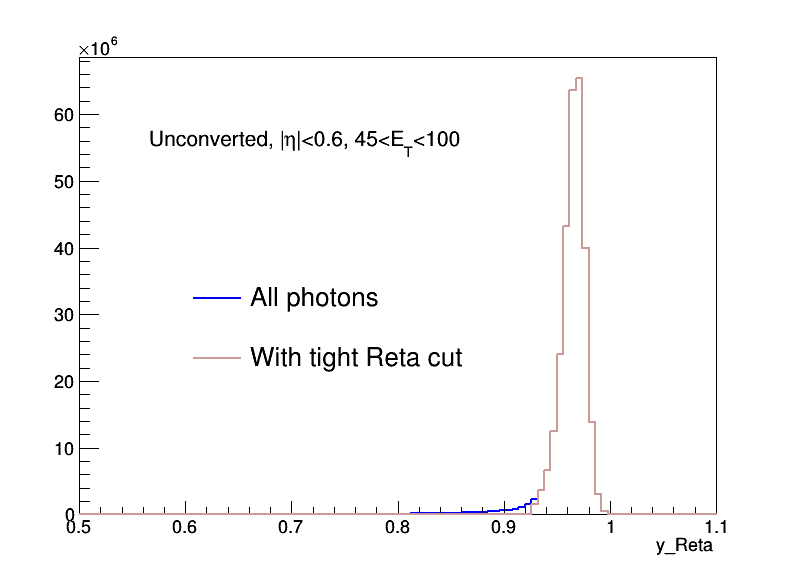

In [17]:
# The condition on the data frame to select signal photons, nonconverted, first eta bin and 45<pT<100 GeV
cond1 = (df['class']==1) & (df['y_convType']==0) & (abs(df['y_eta'])<0.6) & (df['y_pt']>45)  & (df['y_pt']<100) 
#cond2 = (df['class']==1) & (df['y_convType']==0) & (abs(df['y_eta'])<0.6) & (df['y_Reta']>df['y_Reta_cut']) & (df['y_pt']>45) & (df['y_pt']<100) 

# Second condition the same plus passing Reta cuts
myHistsList = PlotHists(2, "y_Reta", [0.5, 1.1], [cond1, cond1 & (df['y_Reta']>df['y_Reta_cut'])], ['All photons', 'With tight Reta cut'])

myHistsList[0].SetTitle("")
pav=addText(0.17,0.72,0.52,0.78, "Unconverted, |#eta|<0.6, 45<E_{T}<100", 0.04)
pav.Draw()
c.Draw()

Here we write a function to apply some ID cuts on your choice

In [18]:
def ApplyCuts(df, tid_varslist, tid_apply_cutslist):
    mask_cuts = (df['class']>-1)
    
    for index in range(len(tid_varslist)):
        if (tid_apply_cutslist[index]==True):
            var_current = tid_varslist[index]
            
            if (var_current=='y_Rhad'):
                eta_middle_cond = (abs(df['y_eta'])>0.8) & (abs(df['y_eta'])<1.37)
                eta_edges_cond = (abs(df['y_eta'])<0.8) | (abs(df['y_eta'])>1.52)
                mask_cuts = (mask_cuts) & ( eta_middle_cond*(df['y_Rhad']<df['y_Rhad_cut']) + eta_edges_cond*(df['y_Rhad1']<df['y_Rhad_cut'])   )
        
            elif ((var_current=='y_Reta') | (var_current=='y_Rphi') | (var_current=='y_Eratio')):
                mask_cuts = (mask_cuts) & (df[var_current]>df[var_current+'_cut'])
                
            else:
                mask_cuts = (mask_cuts) & (df[var_current]<df[var_current+'_cut'])
                
    return mask_cuts

And check an effect to apply a cut on Fside.

Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).


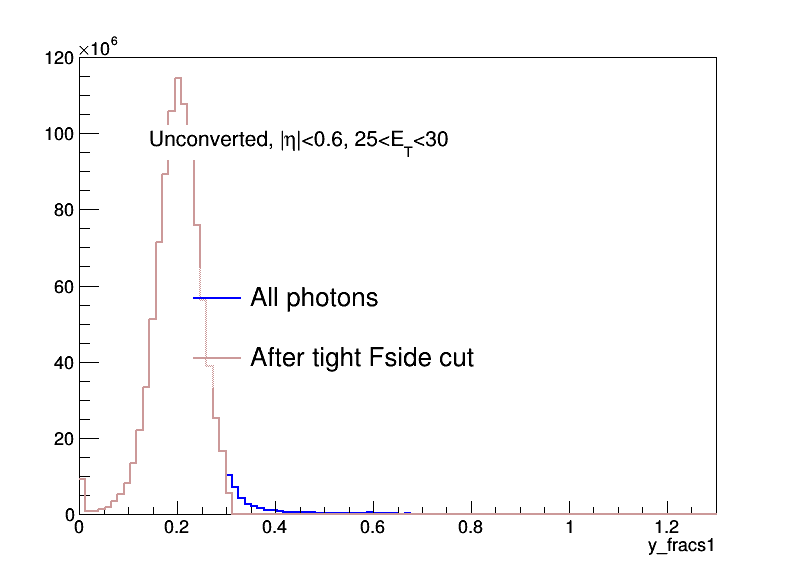

In [19]:
tid_varslist = ['y_Rhad','y_Reta', 'y_Rphi', 'y_weta2', 'y_deltae', 'y_Eratio', 'y_wtots1','y_fracs1', 'y_weta1']
tid_apply_cutslist = [0, 0, 0, 0, 0, 0, 0, 1, 0]

cond1 = (df['class']==1) & (df['y_convType']==0) & (abs(df['y_eta'])<0.6) & (df['y_pt']>25)  & (df['y_pt']<30) 
cond2 = ApplyCuts(df, tid_varslist, tid_apply_cutslist) & (cond1)

myHistsList = PlotHists(2, "y_fracs1", [0., 1.3], [cond1, cond2], ['All photons', 'After tight Fside cut'])

myHistsList[0].SetTitle("")
pav=addText(0.17,0.72,0.52,0.78, "Unconverted, |#eta|<0.6, 25<E_{T}<30", 0.04)
pav.Draw()
c.Draw()

# Plotting selection efficiencies

It is important to understand how to cumpute and plot the photon ID selection efficiencies as a function of certain variables (eta, Et, mu etc).

In [20]:
def PlotEffs(EffsList, LegendList, UnitScale, xtitle):
    
    MyColors = [ROOT.kBlue, ROOT.kRed-8, ROOT.kBlack,ROOT.kMagenta, ROOT.kGreen+2]
    leg = ROOT.TLegend(.13,.22,.37,.43)
    SetOwnership( leg, 0 )
    
    leg.SetBorderSize(0);  leg.SetTextFont(42);
    leg.SetTextSize(0.05);  leg.SetFillColor(0);  leg.SetFillStyle(3001); leg.SetLineColor(0);
    
    for index,hist in enumerate(EffsList):
        hist.SetLineColor(MyColors[index])
        hist.SetLineWidth(2)
        
        if(LegendList):
            leg.AddEntry(hist,LegendList[index],"L")
    
        if(UnitScale):
            hist.Scale(1./hist.Integral())
    
        if(index==0):
            hist.SetTitle(';'+str(xtitle)+' ;efficiency')
            hist.Draw()
            
            ROOT.gPad.Update() 
            graph = hist.GetPaintedGraph() 
            graph.SetMinimum(0.5)
            graph.SetMaximum(1)
            ROOT.gPad.Update()
            
        else:
            hist.Draw('same')
    
    leg.Draw()
    c.Draw()

In [21]:
def PlotEfficiency(nhists, varname, hrange, nbins, condlistall, condlistpass, leglist, UnitScale=False):
    # Inputs:
    # - nhists : number of plotted histograms (e.g 1 or 2)
    # - varname : name of variable (e.g y_Reta). Should agree with the dataframe
    # - hrange : range [xmin, xmax] in which the plotting should be done (e.g. [0.3, 1.1])
    # - condlist : conditions for selection of corresponding (e.g (df['class']==1))
    # - leglist : list of strings corresponding to and explaining histograms (e.g ['conv', 'unconv'])
    # - UnitScale : True by default
    
    HistsListAll = []
    HistsListPass = []
    EffsList = []
    LegendList = leglist
    
    for myhist in range(nhists):   ### loop over histograms
        
        # Create a histogram "all"
        HistsListAll.append( ROOT.TH1D("hist"+str(myhist), varname, nbins, hrange[0], hrange[1]) )
        
        # Fill a histogram "all"
        rootnp.fill_hist(HistsListAll[myhist], df[ condlistall[myhist] ][varname].values, 
                         df[ condlistall[myhist] ]['mcTotWeight'].values)
        
        # Add a title to x-axis in "all"
        HistsListAll[myhist].GetXaxis().SetTitle(varname)
        
        # Create a histogram "pass"
        HistsListPass.append( ROOT.TH1D("hist"+str(myhist), varname, nbins, hrange[0], hrange[1]) )
        
        # Fill a histogram "pass"
        rootnp.fill_hist(HistsListPass[myhist], df[ condlistpass[myhist] ][varname].values, 
                         df[ condlistpass[myhist] ]['mcTotWeight'].values)
        
        # Add a title to x-axis in "pass"
        HistsListPass[myhist].GetXaxis().SetTitle(varname)
        
        
        # Efficiencies
        EffsList.append( ROOT.TEfficiency( HistsListPass[myhist], HistsListAll[myhist]) )
        
    
    # Plotting
    PlotEffs(EffsList, LegendList, UnitScale, HistsListAll[0].GetXaxis().GetTitle())
    
    # Return to deal with a bug
    return EffsList

Similar function to plot efficiency versus pT. Additional thing is hard-coded rebinning.

In [22]:
def PlotEfficiencyPt(nhists, varname, hrange, nbins, condlistall, condlistpass, leglist, UnitScale=False):
    # Inputs:
    # - nhists : number of plotted histograms (e.g 1 or 2)
    # - varname : name of variable (e.g y_Reta). Should agree with the dataframe
    # - hrange : range [xmin, xmax] in which the plotting should be done (e.g. [0.3, 1.1])
    # - condlist : conditions for selection of corresponding (e.g (df['class']==1))
    # - leglist : list of strings corresponding to and explaining histograms (e.g ['conv', 'unconv'])
    # - UnitScale : True by default
    
    HistsListAll = []
    HistsListPass = []
    EffsList = []
    LegendList = leglist
    
    nbins = 300
    photon_pt_bins = array.array('d', [0,10,15,20,25,30,35,40,45,50,60,80,100,125,150,175,250,1500])
    PtArraySize = 18
    
    for myhist in range(nhists):   ### loop over histograms
        
        # Create a histogram "all"
        HistsListAll.append( ROOT.TH1D("hist"+str(myhist), varname, nbins, 0, 1500) )
        
        # Fill a histogram "all"
        rootnp.fill_hist(HistsListAll[myhist], df[ condlistall[myhist] ][varname].values, 
                         df[ condlistall[myhist] ]['mcTotWeight'].values)
        
        # Rebinning
        HistsListAll[myhist] = HistsListAll[myhist].Rebin(PtArraySize-1, "hist1"+str(myhist),photon_pt_bins)
        
        # Add a title to x-axis in "all"
        HistsListAll[myhist].GetXaxis().SetTitle(varname)
        HistsListAll[myhist].GetXaxis().SetRangeUser(hrange[0], hrange[1])
        
        # Create a histogram "pass"
        HistsListPass.append( ROOT.TH1D("hist"+str(myhist), varname, nbins, 0, 1500) )
        
        # Fill a histogram "pass"
        rootnp.fill_hist(HistsListPass[myhist], df[ condlistpass[myhist] ][varname].values, 
                         df[ condlistpass[myhist] ]['mcTotWeight'].values)
        
        # Rebinning
        HistsListPass[myhist] = HistsListPass[myhist].Rebin(PtArraySize-1, "hist2"+str(myhist),photon_pt_bins)
        
        # Add a title to x-axis in "pass"
        HistsListPass[myhist].GetXaxis().SetTitle(varname)
        HistsListPass[myhist].GetXaxis().SetRangeUser(hrange[0], hrange[1])
        
        
        # Efficiencies
        EffsList.append( ROOT.TEfficiency( HistsListPass[myhist], HistsListAll[myhist]) )
        
    
    # Plotting
    PlotEffs(EffsList, LegendList, UnitScale, HistsListAll[0].GetXaxis().GetTitle())
    
    # Return to deal with a bug
    return EffsList

## Adding Tight-ID selection to the data frame

In [23]:
# List of shower shapes
tid_varslist = ['y_Rhad','y_Reta', 'y_Rphi', 'y_weta2', 'y_deltae', 'y_Eratio', 'y_wtots1','y_fracs1', 'y_weta1']

# List of corresponding cuts that should be apllied
df['isMyTight'] = ApplyCuts(df, tid_varslist, [1, 1, 1, 1, 1, 1, 1, 1, 1] ) # Apply all cuts

/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]
/Users/okiverny/anaconda3/envs/root_env/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


#### Tight ID efficiency vs photon eta

Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist0 (Potential memory leak).
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weig

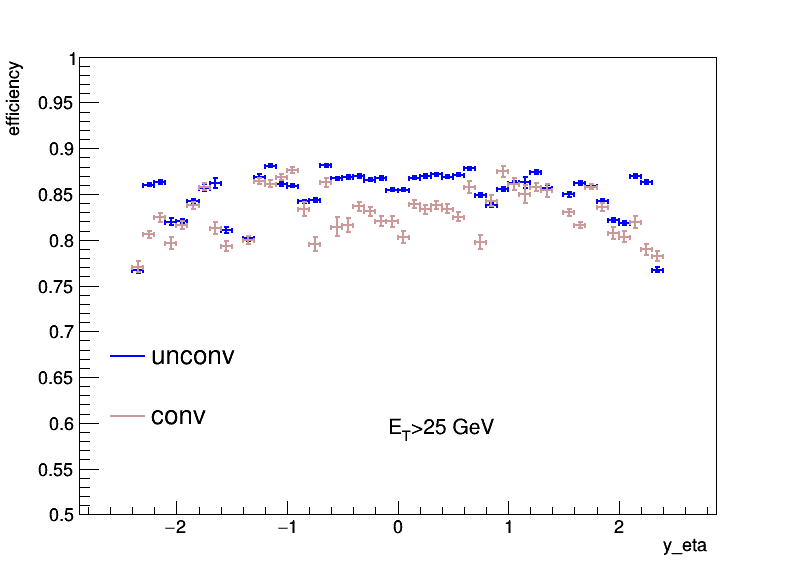

In [24]:
cond_all_unconv = (df['class']==1) & (df['y_convType']==0) & (abs(df['y_eta'])<2.37) & (df['y_pt']>45)
cond_pass_unconv = (cond_all_unconv) & (df['isMyTight']==True)

cond_all_conv = (df['class']==1) & (df['y_convType']!=0) & (abs(df['y_eta'])<2.37) & (df['y_pt']>45)
cond_pass_conv = (cond_all_conv) & (df['isMyTight']==True)

cond_all_list = [cond_all_unconv, cond_all_conv]
cond_pass_list = [cond_pass_unconv, cond_pass_conv]
leglist = ['unconv', 'conv']

HistsListPass = PlotEfficiency(2, "y_eta", [-2.4, 2.4], 48, cond_all_list, cond_pass_list, leglist)
pav=addText(0.47,0.22,0.82,0.28, "E_{T}>25 GeV", 0.04)
pav.Draw()
c.Draw()

#### Tight ID efficiency vs photon pT

Without Isolation cut

Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal


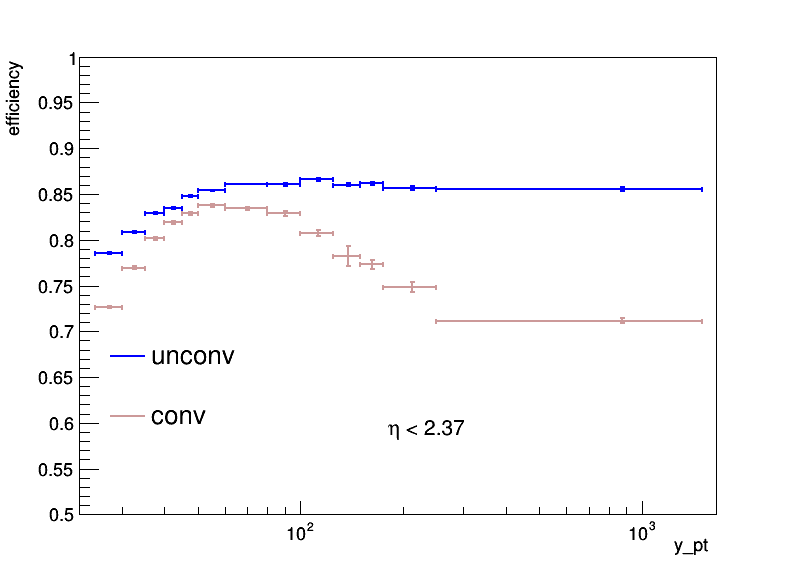

In [25]:
cond_all_unconv = (df['class']==1) & (df['y_convType']==0) & (abs(df['y_eta'])<2.37)
cond_pass_unconv = (cond_all_unconv) & (df['isMyTight']==True)

cond_all_conv = (df['class']==1) & (df['y_convType']!=0) & (abs(df['y_eta'])<2.37)
cond_pass_conv = (cond_all_conv) & (df['isMyTight']==True)

cond_all_list = [cond_all_unconv, cond_all_conv]
cond_pass_list = [cond_pass_unconv, cond_pass_conv]
leglist = ['unconv', 'conv']

HistsListPass = PlotEfficiencyPt(2, "y_pt", [25, 1500], 48, cond_all_list, cond_pass_list, leglist)
pav=addText(0.47,0.22,0.82,0.28, "|#eta| < 2.37", 0.04)
pav.Draw()
c.SetLogx(1)
c.Draw()

## Loose ID efficiency for isolated photons

Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal


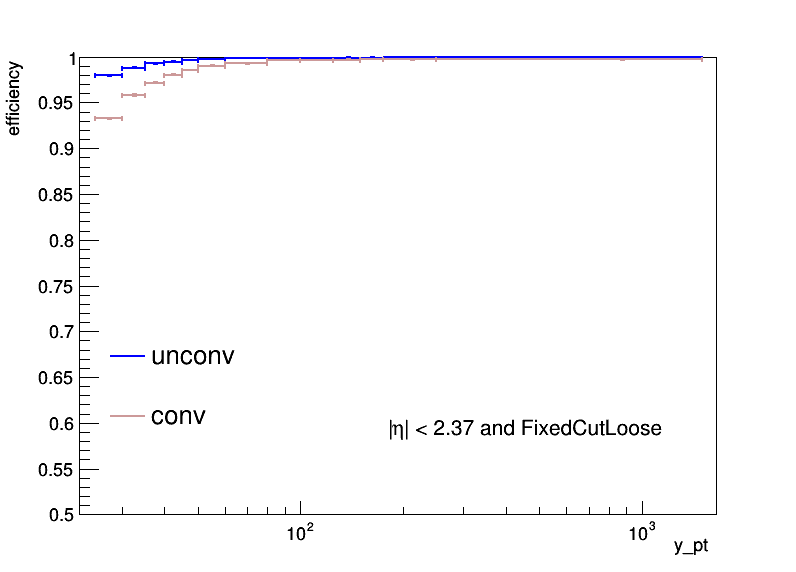

In [30]:
cond_all_unconv = (df['class']==1) & (df['y_convType']==0) & (abs(df['y_eta'])<2.37) & (df['y_ptcone20']<0.05*df['y_pt']) & (df['y_topoetcone20']<0.065*df['y_pt'])
cond_pass_unconv = (cond_all_unconv) & (df['y_IsLoose']==True)

cond_all_conv = (df['class']==1) & (df['y_convType']!=0) & (abs(df['y_eta'])<2.37) & (df['y_ptcone20']<0.05*df['y_pt']) & (df['y_topoetcone20']<0.065*df['y_pt'])
cond_pass_conv = (cond_all_conv) & (df['y_IsLoose']==True)

cond_all_list = [cond_all_unconv, cond_all_conv]
cond_pass_list = [cond_pass_unconv, cond_pass_conv]
leglist = ['unconv', 'conv']

HistsListPass = PlotEfficiencyPt(2, "y_pt", [25, 1500], 48, cond_all_list, cond_pass_list, leglist)
pav=addText(0.47,0.22,0.82,0.28, "|#eta| < 2.37 and FixedCutLoose", 0.04)
pav.Draw()
c.SetLogx(1)
c.Draw()

# One-bit efficiency

In [ ]:
tid_varslist = ['y_Rhad','y_Reta', 'y_Rphi', 'y_weta2', 'y_deltae', 'y_Eratio', 'y_wtots1','y_fracs1', 'y_weta1']

cond_eta_unconv_sig = (df['class']==1) & (df['y_convType']==0) & (abs(df['y_eta'])<2.37)

cond_Rhad = ApplyCuts(df, tid_varslist, [1, 0, 0, 0, 0, 0, 0, 0, 0] ) & (cond_eta_unconv_sig)
cond_Reta = ApplyCuts(df, tid_varslist, [0, 1, 0, 0, 0, 0, 0, 0, 0] ) & (cond_eta_unconv_sig)
cond_Rphi = ApplyCuts(df, tid_varslist, [0, 0, 1, 0, 0, 0, 0, 0, 0] ) & (cond_eta_unconv_sig)
cond_weta2 = ApplyCuts(df, tid_varslist, [0, 0, 0, 1, 0, 0, 0, 0, 0] ) & (cond_eta_unconv_sig)
cond_deltae = ApplyCuts(df, tid_varslist, [0, 0, 0, 0, 1, 0, 0, 0, 0] ) & (cond_eta_unconv_sig)

cond_all_list = [cond_eta_unconv_sig, cond_eta_unconv_sig, cond_eta_unconv_sig, cond_eta_unconv_sig,cond_eta_unconv_sig]
cond_pass_list = [cond_Rhad, cond_Reta, cond_Rphi, cond_weta2,cond_deltae]
leglist = ['Rhad','Reta','Rphi','weta2','deltaE']

HistsListPass = PlotEfficiency(5, "evt_mu", [0, 50], 25, cond_all_list, cond_pass_list, leglist)

pav=addText(0.47,0.22,0.82,0.28, "Unconverted, |#eta|<2.37", 0.04)
pav.Draw()
c.Draw()

With Isolation cut

In [ ]:
cond_iso_cut = (df['y_topoetcone20']<0.065*df['y_pt']) & (df['y_ptcone20']<0.05*df['y_pt'])

cond_all_unconv = (df['class']==1) & (df['y_convType']==0) & (abs(df['y_eta'])<2.37) & (cond_iso_cut)
cond_pass_unconv = (cond_all_unconv) & (df['isMyTight']==True) & (cond_iso_cut)

cond_all_conv = (df['class']==1) & (df['y_convType']!=0) & (abs(df['y_eta'])<2.37) & (cond_iso_cut)
cond_pass_conv = (cond_all_conv) & (df['isMyTight']==True) & (cond_iso_cut)

cond_all_list = [cond_all_unconv, cond_all_conv]
cond_pass_list = [cond_pass_unconv, cond_pass_conv]
leglist = ['unconv', 'conv']

HistsListPass = PlotEfficiencyPt(2, "y_pt", [25, 1500], 48, cond_all_list, cond_pass_list, leglist)
pav=addText(0.47,0.22,0.82,0.28, "#eta < 2.37, Isolated", 0.04)
pav.Draw()
c.SetLogx(1)
c.Draw()

# (N-1)-bit efficiency

In [ ]:
tid_varslist = ['y_Rhad','y_Reta', 'y_Rphi', 'y_weta2', 'y_deltae', 'y_Eratio', 'y_wtots1','y_fracs1', 'y_weta1']

cond_eta_unconv_sig = (df['class']==1) & (df['y_convType']==0) & (abs(df['y_eta'])<2.37)
cond_pass = (cond_eta_unconv_sig) & ApplyCuts(df, tid_varslist, [1, 1, 1, 1, 1, 1, 1, 1, 1] )

cond_Rhad = ApplyCuts(df, tid_varslist, [0, 1, 1, 1, 1, 1, 1, 1, 1] ) & (cond_eta_unconv_sig)
cond_Reta = ApplyCuts(df, tid_varslist, [1, 0, 1, 1, 1, 1, 1, 1, 1] ) & (cond_eta_unconv_sig)
cond_Rphi = ApplyCuts(df, tid_varslist, [1, 1, 0, 1, 1, 1, 1, 1, 1] ) & (cond_eta_unconv_sig)
cond_weta2 = ApplyCuts(df, tid_varslist, [1, 1, 1, 0, 1, 1, 1, 1, 1] ) & (cond_eta_unconv_sig)
cond_deltae = ApplyCuts(df, tid_varslist, [1, 1, 1, 1, 0, 1, 1, 1, 1] ) & (cond_eta_unconv_sig)

cond_all_list = [cond_Rhad, cond_Reta, cond_Rphi, cond_weta2,cond_deltae]
cond_pass_list = [cond_pass, cond_pass, cond_pass, cond_pass,cond_pass]

leglist = ['Rhad','Reta','Rphi','weta2','deltaE']

HistsListPass = PlotEfficiency(5, "evt_mu", [0, 50], 25, cond_all_list, cond_pass_list, leglist)

pav=addText(0.47,0.22,0.82,0.28, "Unconverted, |#eta|<2.37", 0.04)
pav.Draw()
c.Draw()

In [ ]:
PlotHists(2, "y_pt", [0, 40.1], [cond1, cond2], ['unconv-all', 'unconv-tight'])